<center>
<img src="https://raw.githubusercontent.com/FUlyankin/r_probability/master/end_seminars_2020/sem08/real_expect.png" width="800">

# Yet another matstat course: домашнее задание 3
</center>


**ФИО:** Ковель Александр Денисович

__Жёсткий дедлайн:__ 23:59MSK 30.03.2025

## Формат сдачи

Сам ноутбук называйте в формате hw-06-USERNAME.ipynb, где USERNAME — ваши фамилия и имя. Файл надо будет сдать в anytask.

## Задача 1: метрика плохих показов (13 баллов)

Мало того, что в интернете постоянно кто-то не прав, так ещё и куча спама, фейков, хейтспича, кликбейта и другого «плохого» контента. Каждая уважающая себя платформа борется с ним. Более того, гиганты вроде Facebook публикуют [transparency-отчёты](https://transparency.fb.com/reports/community-standards-enforcement/) о том, сколько показов «плохого» контента пропустила их система модерации. 

Давайте представим себе, что мы Youtube. Мы хотим, чтобы пользователям как можно реже показывался «плохой» контент (например, спам или порно). 

К сожалению, мы не можем сделать ручную разметку всех видео, которые загружают люди. Поток нового видео на платформе постоянно растёт. Нам надо будет поддерживать огромный штат модераторов. Поэтому для каждого нарушения, с помощью машинного обучения, обычно делают классификаторы. Нейросети пытаются предсказать, есть ли в видео неприемлимый контент. Если его вероятность высокая, видео автоматически банится. Если нейросеть не уверена, видео отправляют на разметку модераторам. Если мы обучим хороший классификатор, подавляющая часть потока будет оставаться без модерации. 

Параллельно с классификатором мы можем начать размечать модераторами жалобы и самые вирусные видосы. Машинное обучение даёт осечки. Какое-то одно «плохое» видео, пропущенное нашей системой, может набрать много показов. Постмодерация самых вирусных видео и жалоб могут нас от этого спасти. 

Нам хотелось бы понимать, насколько хорошо работает система модерации. Для этого мы будем оценивать долю «плохих» показов. Если мы показываем видео со спамом, такие показы мы считаем плохими.

**Наша задача**  —  получить несмещённую оценку доли плохих показов на youtube, а также построить для неё доверительный интервал. Тогда мы будем видеть, с каким нарушением у нас больше всего проблем, а также сможем придумывать для системы модерации разные улучшения и понимать, насколько они эффективны.

#### 1. Данные

У нас есть данные о просмотре видео на youtube за сутки. Таблица весьма громадная, так как она содержит несколько миллиардов уникальных видео. Мы хотим выбрать из неё тысячу случайных видео, чтобы модераторы разметили их на спам. При этом, нам нужно учесть частоту просмотров. Популярные видео должны иметь больше шансов попасть в подвыборку. Тогда по этой разметке мы сможем оценить долю плохих показов. 

|      video                         |            shows                  |
|:----------------------------------:|:---------------------------------:|
| Baby Shark                         |  13 840 000 000                   |
| Despacito                          |   8 340 000 000                   |
| Johny Johny Yes Papa               |   6 850 000 000                   |
| ........                           |   ........                        |
| 1. Андан-2025: симуляции           |   2                               |

Давайте посчитаем для каждого видео вероятность, что оно будет показно и сделаем `np.random.choice`, как в коде ниже.

In [1]:
import numpy as np 
import pandas as pd 
import scipy.stats as sts

In [2]:
# сгенерируем показы из распределения Парето, чтобы было побольше выбросов как в жизни.
n_obs = 10**6

b = 0.7
rv = sts.pareto(b)
shows = np.round(rv.rvs(n_obs))
shows # это показы

array([ 6., 15.,  2., ...,  2.,  4.,  2.])

In [3]:
videos = np.arange(1, n_obs + 1) # это id видео
videos

array([      1,       2,       3, ...,  999998,  999999, 1000000])

In [4]:
p = shows / shows.sum() # это вероятность того что видео будет показано
p

array([5.25737505e-09, 1.31434376e-08, 1.75245835e-09, ...,
       1.75245835e-09, 3.50491670e-09, 1.75245835e-09])

In [5]:
# генерируем выборку без повторений из 100 видео с учётом показов (более частые видео попадут в выборку вероятнее)
k = 100
np.random.choice(videos, size=k, replace=False, p = p)

array([837753, 818928, 733631, 715409,  76896, 181190, 659135, 969647,
       872821, 780805, 772162, 785002, 820933,  71073, 208807, 956955,
       384886, 437942, 152115, 312570, 724464, 770510, 120790, 181306,
       518414, 669837, 979443,  51544, 802350, 620823, 883653, 968349,
       229417, 502367, 694656, 224214, 772848, 723270, 166463,   3995,
       464061, 479280, 840861,  13240, 685590, 434115, 869760, 585960,
       762835, 279735, 764891, 194573, 281343, 413979, 551395, 930951,
       315773,  60778, 738283, 922435, 796073, 568055, 838883,  49891,
       106622, 788010, 328975, 352817, 635462,  75202, 454289, 689491,
       650940, 915950, 458178, 904484, 349243, 537334, 415792,  28212,
       115292, 437241, 551480, 193894, 528741, 109763, 371454, 579648,
        22050, 152941, 964927, 328476, 887382, 417329, 479605, 635282,
       295929, 142369, 765398, 765375])

У такого подхода есть проблема. Если в таблице миллиарды строк, мы не сможем сохранить таблицу в оперативную память. Нам для генерации выборки понадобится супер-компьютер. Хотелось бы этого избежать. К счастью, для решения этой проблемы есть [много алгоритмов,](https://en.wikipedia.org/wiki/Reservoir_sampling) и мы с вами реализуем один из них.

#### 2. Сэмплирование с повторениями

Для начала поработаем с сэмплированием с повторениями. Сгенерируем таблицу с данными. 



In [6]:
np.random.seed(42)
n_obs = 10**5

b = 0.7
rv = sts.pareto(b)

df = pd.DataFrame.from_dict({
    'video_id': np.arange(1, n_obs + 1),
    'shows': np.round(rv.rvs(n_obs)),
    'is_spam': np.random.binomial(1, 0.10, n_obs), # пусть в 10% видео встречается спам
})

print(df.shape)
df.head()

(100000, 3)


,video_id,shows,is_spam
0,1,2.0,0
1,2,74.0,0
2,3,7.0,0
3,4,4.0,0
4,5,1.0,0


__а) [1 балл]__  Посчитайте по табличке `df` истиную долю плохих показов: 

$$
p_{\text{bad}} = \frac{\sum_{v \in V} \text{show}(v) \cdot \text{isSpam}(v) }{\sum_{v \in V} \text{show}(v)}.
$$

In [7]:
bad_shows = (df['shows'] * df['is_spam']).sum() 
total_shows = df['shows'].sum() 

p_bad = bad_shows / total_shows  
print(f'Истинная доля плохих показов: {p_bad:.4f}')

Истинная доля плохих показов: 0.0305


Мы не знаем всех меток $\text{isSpam}(v)$. Мы можем позволить себе разметить маленький сэмпл, $S ⊂ V$. Каждое видео попадает к нам в сэмпл пропорционально числу его показов. Поэтому логично оценить долю плохих показов как 

$$
\hat{p}_{\text{bad}} = \frac{1}{|\text{S}|}\sum_{v \in S} \text{isSpam}(v).
$$

__б) [1 балл]__ С помощью функции `np.random.choice` cделайте $10^4$ выборок __с повторениями__ размера $1000$. 

Постройте для каждой оценку доли плохих показов. Считайте, что модератор во время разметки безошибочно определяет значение из колонки `is_spam`. 

Нарисуйте гистограмму для получившегося распределения. Отметьте на ней настоящую долю плохих показов и получившееся у вас среднее. Правда ли, что мы получили несмещённую оценку?

**Hint:** Перейдите от `pandas` к `numpy` и обратите внимание на команду `argsort()`. Такой код будет работать быстрее.

In [8]:
import matplotlib.pyplot as plt

n_samples = 10_000
sample_size = 1000
p_true = bad_shows / total_shows

is_spam_values = df['is_spam'].values

In [9]:
p_bad_estimates = []
for _ in range(n_samples):
    sample_indices = np.random.choice(n_obs, size=sample_size, replace=True, p=df['shows']/df['shows'].sum())
    sample_is_spam = is_spam_values[sample_indices]
    p_bad_estimate = np.mean(sample_is_spam)  
    p_bad_estimates.append(p_bad_estimate)

p_bad_estimates = np.array(p_bad_estimates)

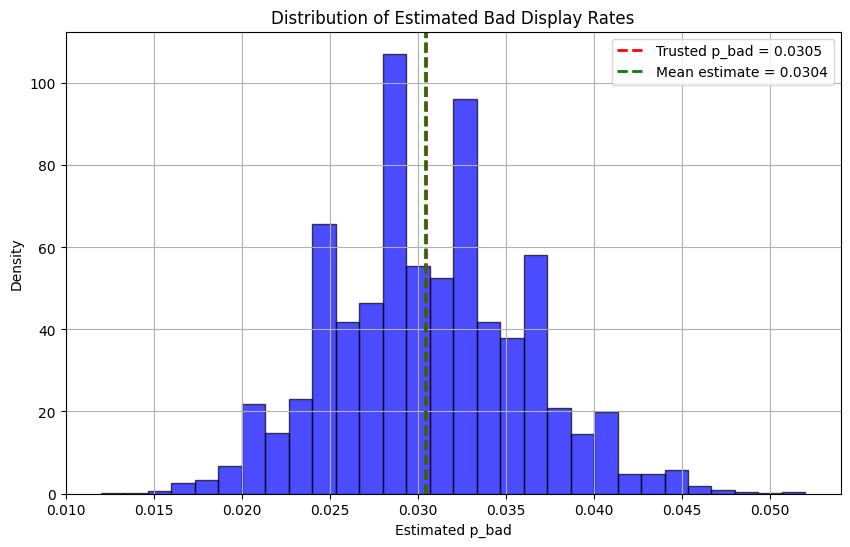

In [10]:
plt.figure(figsize=(10, 6))
plt.hist(p_bad_estimates, bins=30, alpha=0.7, color='blue', edgecolor='black', density=True)
plt.axvline(p_true, color='red', linestyle='dashed', linewidth=2, label=f'Trusted p_bad = {p_true:.4f}')
plt.axvline(p_bad_estimates.mean(), color='green', linestyle='dashed', linewidth=2, label=f'Mean estimate = {p_bad_estimates.mean():.4f}')
plt.title('Distribution of Estimated Bad Display Rates')
plt.xlabel('Estimated p_bad')
plt.ylabel('Density')
plt.legend()
plt.grid()
plt.show()

In [11]:
print(f'Истинная доля плохих показов: {p_true:.4f}')
print(f'Средняя оценка доли плохих показов: {p_bad_estimates.mean():.4f}')

Истинная доля плохих показов: 0.0305
Средняя оценка доли плохих показов: 0.0304


#### 3. Сэмплирование без повторений

Выше мы сказали, что делать `np.random.choice` для огромных таблиц невозможно, так как они не поместятся в оперативную память. 

Более того, нам надо дать модераторам разметить видео на спам. Многие видео будут повторяться. Уникальных видео каждый раз будет разное количество. Нагрузка на модераторов будет неравномерной. Они будут жаловаться на это. Хочется, чтобы нагрузка всегда была одинаковой.

Давайте сменим подход и будем делать **случайную взвешенную выборку БЕЗ ПОВТОРЕНИЙ.** Это означает, что наблюдения зависят друг от друга. Причём корреляция между ними довольно высокая. Это будет приводить к проблемам. 

Пусть у нас есть $n$ объектов. Мы хотим отобрать $k$ видео для разметки модераторами. Использование `np.random.choice` можно проинтерпретировать следующим образом: 

1. Напишем название $i-$го видео на разных табличках $\text{shows}_i$ раз.
2. Случайно перемешаем все таблички и положим их в стопку в случайном порядке.
3. Будем отбирать самые верхние таблички до тех пор, пока не встретим $k$ разных названий видео.

Если бы нам были бы не важны веса в виде показов, каждое видео попадало бы к нам в выборку равновероятно. Мы могли бы отобрать выборку размера $k$ следущим образом: 

1. Для каждого видео генерируем $X_i \sim U[0; 1]$ (по одной табличке на видео).
2. Сортируем все видео по сгенерированной случайной величине.
3. Срезаем топ-k видео в итоговую выборку.

Веса в виде показов для нас важны. В теринах равномерных случайных величин алгоритм с весами можно записать так: 

1. Для $i$-го видео генерируем $\text{shows}_i$ независимых равномерных случайных величин (для каждого видео свое число табличек). 
2. Складываем все таблички в одну стопку и сортируем их по сгенерированным величинам.
3. Идём по массиву от больших элементов к меньшим и отбираем видео, пока не накопим $k$ элементов.

Очень не хочется для какого-нибудь популярного видео генерировать несколько миллиардов случайных чисел. Конечно же, сразу нужно генерировать случайную величину, которая будет максимумом нескольких независимых равномерных случайных величин. На итоговую сортировку это никак не повлияет. Мы отберём те же самые видео.  



Сгенерировать для каждого видео $X_{i,max}$ можно с помощью квантильного преобразования. 

Пусть случайные величины $X_1, \ldots, X_m \sim \text{iid} \, U[0;1].$ Пусть $Y = \max(X_1, \ldots, X_m).$ 

Мы знаем, что $F_{Y}(x) = x^m,$ если $x \in [0; 1].$ Выборку из распределения $F_{Y}(x)$ можно сгенерировать в два шага: 

- $x_1, \ldots, x_m \sim \text{iid} \, U[0;1]$
- $y_i = x_i^{\frac{1}{m}}$

__в) [1 балл]__ Фактически нам надо отсортировать все видео по величине $X_i^{\frac{1}{\text{shows}_i}}$, где $X_i \sim U[0;1]$, и отобрать топ-$k$ видео в выборку для разметки модераторами. Сделайте, используя эту процедуру, для таблицы `df` сэмпл размера $100$.

In [12]:
sample_size = 100
k = 10 

U = np.random.uniform(0, 1, n_obs)

Y = U ** (1 / df['shows'].to_numpy())

df['Y'] = Y

top_videos = df.nlargest(k, 'Y')

print("Топ-{} видео для разметки модераторами:".format(k))
print(top_videos[['video_id', 'shows', 'Y']])

Топ-10 видео для разметки модераторами:
       video_id       shows         Y
15618     15619    778644.0  1.000000
89529     89530  19257035.0  1.000000
43676     43677   3216133.0  1.000000
531         532    117586.0  1.000000
58232     58233   1066786.0  1.000000
51554     51555    267762.0  1.000000
46862     46863   1726808.0  1.000000
96707     96708   3972215.0  1.000000
46179     46180     17485.0  1.000000
21818     21819     12628.0  0.999999


__г) [1 балл]__ Вычислять на компьютере корни из числа, лежащего между 0 и 1 не очень удобно с точки зрения округления. Могут возникать большие ошибки.

Гораздо эффективнее отобрать топ по величине $\frac{1}{\text{shows}_i} \cdot \ln X_i$, где $X_i \sim U[0;1]$. Проделайте это.

In [15]:
Z = (1 / df['shows'].to_numpy()) * np.log(U)

df['Z'] = Z

top_videos = df.nlargest(k, 'Z')

print("Топ-{} видео для разметки модераторами:".format(k))
print(top_videos[['video_id', 'shows', 'Z']])

Топ-10 видео для разметки модераторами:
       video_id       shows             Z
15618     15619    778644.0 -4.372792e-08
89529     89530  19257035.0 -4.951035e-08
43676     43677   3216133.0 -1.203337e-07
531         532    117586.0 -1.554666e-07
58232     58233   1066786.0 -1.613684e-07
51554     51555    267762.0 -1.754896e-07
46862     46863   1726808.0 -1.818553e-07
96707     96708   3972215.0 -2.499576e-07
46179     46180     17485.0 -3.927103e-07
21818     21819     12628.0 -6.122791e-07


Такую процедуру можно найти в продакшн-процессах у многих компаний. В Яндексе похожая процедура используется для сэмплирования поисковых запросов для дальнейшей разметки. [В статье](https://yadi.sk/i/IxKLPFEj3TSpPe) можно найти доказательство того, что алгоритм даст корректную вероятность для каждого видео.

В примере выше, мы держим табличку в оперативной памяти компьютера. Это игрушечный пример, и это позволительно. В реальной жизни мы можем считывать строки с жесткого диска, для каждой из них по очереди генерировать случайную величину и поддерживать топ-к уникальных видео в памяти. Например, в этом может помочь такая структура данных [как куча.](https://ru.wikipedia.org/wiki/Куча_(структура_данных)) 

#### 4. Оценка доли плохих показов

Дальше нам остаётся разметить видео и аккуратно посчитать итоговую метрику. Беда будет в том, что она окажется смещённой. 

__д) [1 балл]__ Сделайте $10^4$ выборок размера $1000$. Постройте для каждой оценку доли плохих показов. Считайте, что модератор во время разметки безошибочно определяет значение из колонки `is_spam`. 

Нарисуйте гистограмму для получившегося распределения. Отметьте на ней настоящую долю плохих показов и получившееся у вас среднее. Правда ли, что они сильно отличаются друг от друга? Найдите среднее смещение оценки.

In [16]:
p_bad_estimates = []
for _ in range(n_samples):
    sample_indices = np.random.choice(n_obs, size=sample_size, replace=True, p=df['shows']/df['shows'].sum())
    sample_is_spam = df['is_spam'].iloc[sample_indices]
    p_bad_estimate = sample_is_spam.mean() 
    p_bad_estimates.append(p_bad_estimate)

p_bad_estimates = np.array(p_bad_estimates)

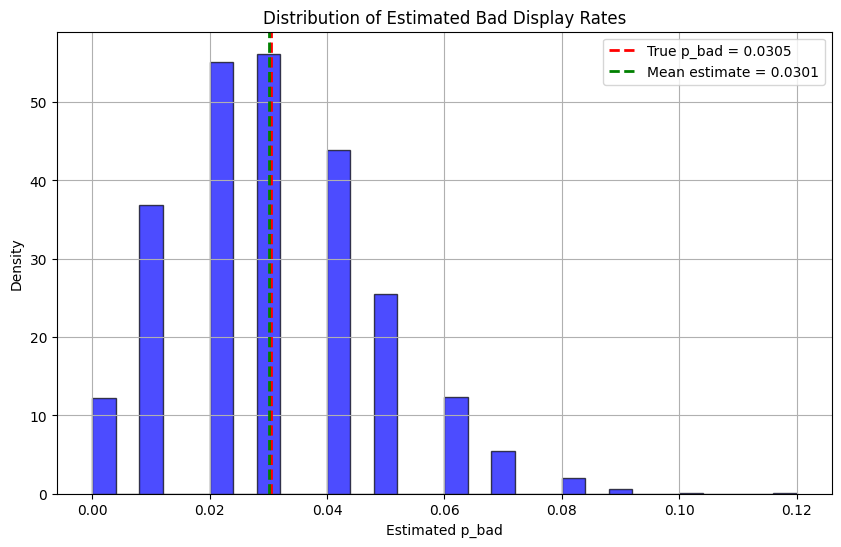

In [17]:
plt.figure(figsize=(10, 6))
plt.hist(p_bad_estimates, bins=30, alpha=0.7, color='blue', edgecolor='black', density=True)
plt.axvline(p_true, color='red', linestyle='dashed', linewidth=2, label=f'True p_bad = {p_true:.4f}')
plt.axvline(p_bad_estimates.mean(), color='green', linestyle='dashed', linewidth=2, label=f'Mean estimate = {p_bad_estimates.mean():.4f}')
plt.title('Distribution of Estimated Bad Display Rates')
plt.xlabel('Estimated p_bad')
plt.ylabel('Density')
plt.legend()
plt.grid()
plt.show()

In [18]:
bias = p_bad_estimates.mean() - p_true
print(f'Истинная доля плохих показов: {p_true:.4f}')
print(f'Средняя оценка доли плохих показов: {p_bad_estimates.mean():.4f}')
print(f'Среднее смещение оценки: {bias:.4f}')

Истинная доля плохих показов: 0.0305
Средняя оценка доли плохих показов: 0.0301
Среднее смещение оценки: -0.0004


**Откуда появляется это смещение?** Представим себе, что у нас есть случайная величина $X$, которая принмает пять значений с вероятностями 

<center>

|  $X$         | $x_1$   | $x_2$ | $x_3$ | $x_4$    | $x_5$    |
|:------------:|:-------:|:-----:|:-----:|:--------:|:--------:|
| $P(X = x)$   | $^1/_2$ |$^1/_4$|$^1/_8$|$^1/_{16}$|$^1/_{16}$|

</center>

Если мы делаем выборку с повторениями, как часто туда будет попадать элемент $x_1$? Элемент попадает в выборку с вероятностью $^1/_2.$ Будем вытаскивать из выборки элементы до тех пор, пока $x_1$ не окажется в наших руках. Номер попытки, начиная с которой $x_1$ окажется у нас, имеет геометрическое распределение. Если $Y \sim \text{Geom}(p),$ тогда $\mathbb{E}(Y) = \frac{1}{p}.$ 

Получается, элемент $x_1$ окажется в нашей выборке в среднем на второй попытке. Если бы мы делали выборку с повторениями, каждый второй элемент в ней был бы равен $x_1,$  каждый четвёртый был бы равен $x_2$, каждый восьмой был бы равен $x_3$ и так далее. Обратим внимание, что если мы делаем выборку из трёх элементов без повторений, то чаще всего мы будем работать с выборкой $x_1, x_2, x_3$. 

В ситуации с видео, мы сэмплируем их пропорционально числу показов. В числе показов может быть очень сильный перекос. Какие-то видео показываются в рекомендательной системе десятки раз, а какие-то вирусятся и прорываются в тренды. Каждый раз, когда мы __без возвращения__ берём новое видео в выборку, мы как бы занижаем его вес в несмещённой выборке (выборке с повторениями).

#### 5. Исправляем смещение

На выборку без повторений размера $n$ можно смотреть следующим образом: мы генерируем выборку с возвращением до тех пор, пока количество уникальных элементов не достигнет числа $n$. При этом, если мы берём на каком-то шаге элемент уже выбранный ранее, мы не включаем его в выборку, а только отдельно запоминаем где-нибудь счётчик числа вхождений этого элемента $c_i$. При таком подходе несмещённую оценку доли плохого можно записать как 

$$
\hat{p}_{\text{bad}} = \frac{\sum_{i=1}^{n} c_i \cdot \text{isSpam}(v_i)}{\sum_{i=1}^{n} c_i.}
$$

Если выборка имеет сильно неравномерные веса, то нам придётся довольно долго генерировать элементы с возвращением, пока мы наберём необходимое количество уникальных. 

Поэтому вместо того, чтобы накапливать счётчики вхождений, мы рассчитаем их математическое ожидание по всем сгенерированным выборкам без повторений, имеющим такое же упорядоченное множество элементов $w_i = \mathbb{E}(c_i).$

Пусть $q_i = \frac{show(v_i)}{\sum_{j=1}^{|V|} show(v_j)}$,пусть $w_i^k$ —  количество вхождений элемента с индексом $i$ к моменту, когда в выборке набралось $k$ уникальных элементов. Пусть уникальные элементы попадают в выборку в порядке $v_1, v_2, v_3, \ldots, v_n$. 

Когда мы возьмём первый элемент: 

$$
w_1^1 =1, \quad w_2^1 = 0, \quad w_3^1 = 0, \quad \ldots, \quad w_n^1 = 0.
$$

Прежде, чем мы достанем второй уникальный элемент, мы, в среднем, достанем первый элемент ещё  $\frac{1}{1 - q_1} - 1 = \frac{q_1}{1 - q_1}$ раз. 

Эту величину мы посчитали с помощью геометрического распределения. В качестве успешного события мы рассматриваем второй уникальный элемент. Вероятность успеха равна $1- q_1.$ Геометрическая случайная величина представляет из себя номер первого успешного события. Если мы хотим получить число не успешных событий, надо вычесть единицу.

Получаем

$$
w_1^2 = 1 + \frac{q_1}{1 - q_1}, \quad w_2^2 = 1, \quad w_3^2 = 0, \quad \ldots, \quad w_n^2 = 0.
$$

Прежде, чем мы достанем третий уникальный элемент, мы, в среднем, достанем первые два элемента ещё $\frac{1}{1 - (q_1 + q_2)} - 1 = \frac{q_1 + q_2}{1 - (q_1 + q_2)}$ раз. Из них доля доставания первого элемента составляет $\frac{q_1}{q_1 + q_2}$, а доля второго $\frac{q_2}{q_1 + q_2}$. 

Получаем 

$$
w_1^3 = 1 + \frac{q_1}{1 - q_1} + \frac{q_1}{1 - (q_1 + q_2)}, \quad w_2^3 = 1 + \frac{q_2}{1 - (q_1 + q_2)}, \quad  w_3^3 = 1, \quad \ldots, \quad w_n^3 = 0.
$$

Продолжая эту логику до шага $n,$ получаем формулу 

$$
c_i = w_i^n = 1 + q_i \cdot \left( \sum_{j=i}^{n-1} \frac{1}{1 - \sum_{k=1}^j q_k} \right).
$$

Подставим эти веса вместо счетчиков $c_i$. Это даст нам несмещённую оценку доли «плохих» показов на основе разметки ровно $n$ объектов

$$
\hat p_{\text{bad}} = \frac{\sum_{i=1}^n \left[ 1 + q_i \cdot \left( \sum_{j=i}^{n-1} \frac{1}{1 - \sum_{k=1}^j q_k} \right) \right] \cdot isSpam(v_i)}{\sum_{i=1}^n \left[ 1 + q_i \cdot \left( \sum_{j=i}^{n-1} \frac{1}{1 - \sum_{k=1}^j q_k} \right)  \right]},  \quad q_i = \frac{show(v_i)}{\sum_{j=1}^{|V|} show(v_j)}.
$$



__е) [1 балл]__ Пришло время закодит, полученные выше веса. Сделайте $1000$ выборок без повторений размера $1000$. Постройте для каждой оценку доли плохих показов. Убедитесь, что оценка, предложенная выше, окажется несмещённой.

**Hint:** для расчёта весов удобно воспользоваться несколько раз функцией `np.cumsum`.

In [ ]:
# внимательно изучите этот код:

a = np.array([2, 3, 4, 5])
np.cumsum(a[:-1][::-1])[::-1]

In [19]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

#### 6. Доверительный интервал 

Про долю плохих заказов надо уметь делать выводы. Для этого надо построить доверительный интервал. Для него нужна дисперсия. Все карточки размечаются модераторами незвисимо друг от друга. Получается, что дисперсию можно найти как 

$$
\text{Var}(\hat p_{\text{bad}}) = \frac{\sum_{i=1}^n c^2_i \cdot \text{Var}(\text{isSpam}(v_i))}{\left(\sum_{i=1}^n c_i\right)^2} = \frac{\sum_{i=1}^n c^2_i}{\left(\sum_{i=1}^n c_i\right)^2} \cdot p_{\text{bad}} \cdot (1 - p_{\text{bad}})
$$

Видно, что если сэмпл занимает небольшую долю выборки и показы распределены между элементами достаточно равномерно, то веса $c_i$ будут несильно отличаться от $1$. Тогда асимптотически, по мере роста размера сэмпла, стандартное отклонение метрики будет падать как $\frac{1}{\sqrt{n}}.$ 

Однако, если существенная доля показов в рекомендательной ленте представлена небольшой группой видосов, тогда веса будут существенно различаться и, начиная с определённого момента, увеличение размера выборки не будет давать заметного снижения разброса в оценке доли плохих показов.

__ё) [1 балл]__ Сделайте $1000$ выборок без повторений размера $1000$. Постройте по каждой $95\%$ доверительный интервал для доли плохих показов. 

Убедитесь, что он действительно покрывает долю плохих показов с вероятностью $0.95$.

In [20]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

__ж) [1 балл]__ Если вы всё сделали всё верно, выше симуляции дали очень плохой результат. Доверительный интервал развалился. Он оказался слишком широким. Более того, он пробивает слева ноль. 

Сконструируйте доверительный интервал Уилсона. Убедитесь, что он больше не пробивает отрезок $[0;1]$.

In [21]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

Доверительный интервал Уилсона всё еще не будет давать нужного уровня значимости из-за огромной ширины. Нам нужен какой-то способ уменьшить дисперсию. Это можно сделать с помощью машинного обучения.

#### 7. Уменьшение дисперсии с помощью машинного обучения

Когда доля маленькая, дисперсия оценки доли будет довольно высокой. Относительная ошибка в оценке быстро растёт при уменьшении доли размечаемых видосов, содержащих спам

$$
\frac{\sigma}{p_{\text{bad}}} \approx \frac{\sqrt{ p_{\text{bad}} \cdot (1 -  p_{\text{bad}})/n} }{ p_{\text{bad}} } \approx \frac{1}{\sqrt{n \cdot p_{\text{bad}}}}.
$$

Например, если реальная доля показов, содержащих спам составляет $0.5\%,$ то при разметке выборки из $1000$ видео стандартное отклонение составить $0.22\%$ и положительную метку будут обычно получать $3-7$ видео, а наша оценка доли спама будет колебаться в пределах $(0.5 \pm 0.22)\%.$ При таком уровне шума отслеживать эффект от введения различных улучшений в пайплайнах модерации становится практически невозможно. 

Однако, если бы у нас существовал способ повысить долю просэмплированных видео с положительной разметкой в сто раз, то мы бы получили оценку доли плохого в сэмпле равную $(50 \pm 1.6)\%.$ 

Принимая во внимание, что при построении сэмпла мы завысили долю плохого в сто раз, получаем, что реальная доля плохого составит  $(0.5 \pm 0.016)\%.$ То есть с помощью приоритизации мы могли бы снизить разброс примерно в $14$ раз. 

На практике мы не можем заранее угадать какие видео будут размечены как плохие. Однако у нас есть ML-модели, предсказываютщие подозрительность видео. Например, вероятность того, что видос относится к плохому классу, $\text{score}(v_i)$.

Для того, чтобы сделать размечаемую выборку более представительной по классам, но при этом сохранить репрезентативность по потоку, повысим вероятность сэмплирования видео с высоким уровнем подозрительности.

Чтобы после этого по разметке сэмпла оценить долю плохого на потоке, нам нужно обратно изменить веса видео, чтобы величины соотвествовали ожидаемым значениям без перевзвешивания. Новые веса в формуле будут равны 

$$
c_i = \sum_{i=1}^n  \frac{1 + q_i \cdot \left( \sum_{j=i}^{n-1} \frac{1}{1 - \sum_{k=1}^j q_k}\right)}{\text{score}(v_i)}, \quad q_i = \frac{\text{show}(v_i)}{\sum_{j=1}^{|V|} \text{show}(v_j)}
$$

Оценка доли будет искаться как 

$$
\hat p_{spam} = \frac{\sum_{i=1}^n c_i \cdot \text{isSpam}(v_i)}{\sum_{i=1}^n c_i}.
$$

Аналогично дисперсия такой оценки будет иметь вид 

$$
\text{Var}(\hat p_{\text{bad}}) = \frac{\sum_{i=1}^n c^2_i \cdot \text{Var}(\text{isSpam}(v_i))}{\left(\sum_{i=1}^n c_i\right)^2}.
$$

В формуле дисперсии $\text{Var}(\text{isSpam}(v_i))$ уже нельзя считать одинаковыми, так как есть зависимость между весом объекта, обусловленным $score(v_i)$ и дисперсией бернулиевской случайной величины $\text{isSpam}(v_i).$ 

Если предсказывающая модель обучена в точности на реальном распределении, наблюдаемом в потоке либо [откалибрована,](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/seminars/sem06-calibration.ipynb) то можно считать, что $\text{score}(v_i) = \mathbb{P}(\text{isSpam}(v_i) = 1).$ 

Тогда 

$$
\text{Var}(\text{isSpam}(v_i)) = \mathbb{P}(\text{isSpam}(v_i) = 1) \cdot \mathbb{P}(\text{isSpam}(v_i) = 0) = \text{score}(v_i) \cdot (1 - \text{score}(v_i)).
$$

Если откалибровать модель не представляется возможным,тогда можно оценить математическое ожидание и дисперсию элемента на основе исторических данных по разметке элементов с похожими предсказаниями модели. 

Если для какого-то объекта по каким-то причинам отсутствует $\text{score}(v_i),$ то при сэмплировании мы можем вставить ему произвольный вес и использовать верхнюю оценку на дисперсию бернуллиевской случайной величины, $\text{Var}(\text{isSpam}(v_i)) \le 0.25.$

__з) [1 балл]__  Переделайте процесс генерации данных таким образом, чтобы для них можно было обучить классификатор. С помощью любых функций из sklearn сгенерируйте датасет таким образом, чтобы спам в данных встречался в $10\%$ случаев. Обучите логистическую регрессию. Генерируйте датасет таким образом, чтобы качество модели по метрике roc-auc оказалось в районе 0.8.

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

__и) [1 балл]__ Сделайте $1000$ выборок без повторений размера $1000$. Постройте по каждой $95\%$ доверительный интервал для доли плохих показов. 

Правда ли доверительный интервал стал уже? Правда ли, что он покрывает долю плохих показов с вероятностью $0.95$?

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

__к) [1 балл]__ Проделайте то же самое для доверительного интервала Уилсона.

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

__л) [1 балл]__ Вместо логистической регрессии обучите SVM либо бустинг. Попробуйте построить доверительный интервал одним из способов, упомянутых выше. Что у вас получилось? Правда ли он покрывает долю плохих показов с вероятностью $0.95$? 

In [ ]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

__м) [1 балл]__ Попробуйте в настройках эксперимента поменять долю спама в выборке с $10\%$ до $80\%$. Что произойдёт с дисперсией и смещением?

__Ваш ответ:__ 